In [1]:
# Чтобы не вылетала ошибка Kernel Error при построении графиков в matplotlib
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, ConcatDataset

from transformers import pipeline
from torchvision.transforms.functional import to_pil_image
import diffusers

import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import DatasetFolder
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
import torch.nn.functional as F

import sys
import pkg_resources

C:\Users\Admin\AppData\Local\Temp\ipykernel_17612\3550043486.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 1
NUM_INFERENCE_STEPS = 5
TIMESTEPS = 200

In [4]:
# def collect_image_paths(root_dirs):
#     """Collects image paths from the given directory list."""
#     image_paths = []
#     for root_dir in root_dirs:
#         for subdir, _, files in os.walk(root_dir):
#             for file in files:
#                 if file.lower().endswith(('.png', '.jpg', '.jpeg')):
#                     image_paths.append(os.path.join(subdir, file))
#     return image_paths

# class SimpleCustomDataset(Dataset):
#     """Custom Dataset for loading directly from image paths, labels, and returning paths."""
#     def __init__(self, image_paths, labels, transform=None):
#         self.image_paths = image_paths
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         image_path = self.image_paths[idx]
#         label = self.labels[idx]
#         image = Image.open(image_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)

#         return image, label, image_path


# class SimpleCustomBLIPDataset(Dataset):
#     """Custom Dataset for loading directly from image paths, labels, and returning paths."""
#     def __init__(self, image_paths, labels, blip_input, transform=None):
#         self.image_paths = image_paths
#         self.labels = labels
#         self.transform = transform
#         self.blip_input = blip_input

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         image_path = self.image_paths[idx]
        
#         ### WINDOWS ADDITION!!! BURN IN HELL!!!
#         image_path = image_path.replace("\\","/")
#         ### WINDOWS ADDITION!!! BURN IN HELL!!!
        
#         label = self.labels[idx]
#         image = Image.open(image_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
#         blip_output = self.blip_input[self.blip_input['image_path'] == image_path]['blip'].item()

#         return image, label, image_path, blip_output 

# # Define transformations
# transform1 = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     # transforms.RandomRotation(15),
#     # transforms.RandomResizedCrop(256),
#     # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.ToTensor(),
#     # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
#     # transforms.ToPILImage(),
# ])

# transform2 = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     # transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     transforms.CenterCrop(IMAGE_SIZE),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
# ])

In [5]:
# # Paths for validation data
# ai_paths_val = [
#     # "./dataset_tiny_genimage/imagenet_ai_0419_biggan/val/ai",
#     "./dataset_tiny_genimage/imagenet_ai_0419_vqdm/val/ai",
#     "./dataset_tiny_genimage/imagenet_ai_0424_sdv5/val/ai",
#     "./dataset_tiny_genimage/imagenet_ai_0424_wukong/val/ai",
#     "./dataset_tiny_genimage/imagenet_ai_0508_adm/val/ai",
#     "./dataset_tiny_genimage/imagenet_glide/val/ai",
#     "./dataset_tiny_genimage/imagenet_midjourney/val/ai"
# ]

# nature_paths_val = [
#     # "./dataset_tiny_genimage/imagenet_ai_0419_biggan/val/nature",
#     "./dataset_tiny_genimage/imagenet_ai_0419_vqdm/val/nature",
#     "./dataset_tiny_genimage/imagenet_ai_0424_sdv5/val/nature",
#     "./dataset_tiny_genimage/imagenet_ai_0424_wukong/val/nature",
#     "./dataset_tiny_genimage/imagenet_ai_0508_adm/val/nature",
#     "./dataset_tiny_genimage/imagenet_glide/val/nature",
#     "./dataset_tiny_genimage/imagenet_midjourney/val/nature"
# ]

# # Collect image paths
# # ai_image_paths_train = collect_image_paths(ai_paths_train)
# # nature_image_paths_train = collect_image_paths(nature_paths_train)
# ai_image_paths_val = collect_image_paths(ai_paths_val)
# nature_image_paths_val = collect_image_paths(nature_paths_val)

# # Labels for the images (0 for AI, 1 for nature)
# # ai_labels_train = [0] * len(ai_image_paths_train)
# # nature_labels_train = [1] * len(nature_image_paths_train)
# ai_labels_val = [0] * len(ai_image_paths_val)
# nature_labels_val = [1] * len(nature_image_paths_val)

# # Combine image paths and labels
# # train_image_paths = ai_image_paths_train + nature_image_paths_train
# # train_labels = ai_labels_train + nature_labels_train
# val_image_paths = ai_image_paths_val + nature_image_paths_val
# val_labels = ai_labels_val + nature_labels_val


In [6]:
# df_blip_val = pd.read_csv('./src/blip_val_fullest.csv')

In [7]:
# df_blip_val["image_path"]= df_blip_val.apply(lambda x: x['image_path'].replace('/kaggle/input/tiny-genimage','./dataset_tiny_genimage'), axis=1)

In [8]:
# # Create the dataset
# # train_dataset = SimpleCustomBLIPDataset(train_image_paths, train_labels, blip_input=df_blip_train, transform=transform2)
# val_dataset = SimpleCustomBLIPDataset(val_image_paths, val_labels, blip_input=df_blip_val, transform=transform2)

# # DataLoader setup
# # train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# # Visualization function
# def imshow(img, mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225])):
#     img = img.numpy().transpose((1, 2, 0))
#     img = std * img + mean
#     img = np.clip(img, 0, 1)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

# # Get a batch of images and labels
# images, labels, image_path, blip_output = next(iter(val_loader))  # Note: Change to train_loader
# out = torchvision.utils.make_grid(images)
# imshow(out)

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [20]:
# загрузка весов
from src.fire import FIRE_model

model_fire = FIRE_model().to(device)
model_fire.load_state_dict(torch.load("./models/fire_dm_10.weights", map_location=torch.device(device)))
model_fire.eval()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
\\?\C:\Users\Admin\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
\\?\C:\Users\Admin\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\

FIRE_model(
  (vae): AutoencoderKL(
    (encoder): Encoder(
      (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (down_blocks): ModuleList(
        (0): DownEncoderBlock2D(
          (resnets): ModuleList(
            (0-1): 2 x ResnetBlock2D(
              (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
              (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (nonlinearity): SiLU()
            )
          )
          (downsamplers): ModuleList(
            (0): Downsample2D(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
            )
          )
        )
        (1): DownEncoderBlock2D(
          (resnets): ModuleList(
            (0): ResnetBlock2D(
           

In [21]:
# загрузка весов
from src.fire_blip import FIRE_BLIP_model

model_blip = FIRE_BLIP_model().to(device)
model_blip.load_state_dict(torch.load("./models/fire_blip_10.weights", map_location=torch.device(device)))
model_blip.eval()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


FIRE_BLIP_model(
  (vae): AutoencoderKL(
    (encoder): Encoder(
      (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (down_blocks): ModuleList(
        (0): DownEncoderBlock2D(
          (resnets): ModuleList(
            (0-1): 2 x ResnetBlock2D(
              (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
              (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (nonlinearity): SiLU()
            )
          )
          (downsamplers): ModuleList(
            (0): Downsample2D(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
            )
          )
        )
        (1): DownEncoderBlock2D(
          (resnets): ModuleList(
            (0): ResnetBlock2D(
      

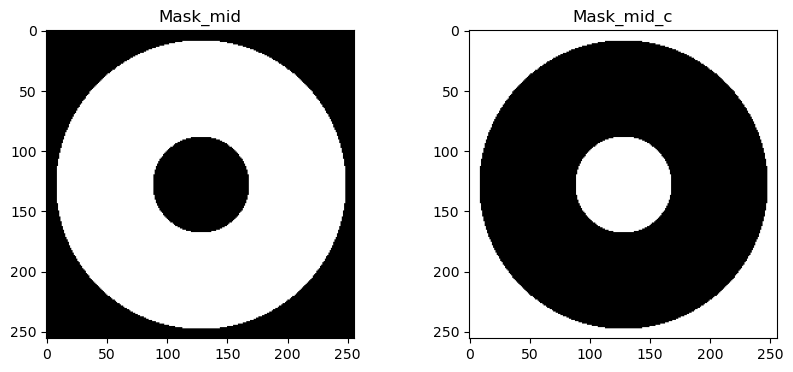

In [29]:
M_mid, M_mid_c = model_fire.fft_filter_module.i_mask, model_fire.fft_filter_module.r_i_mask

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(M_mid[0].cpu().numpy(), cmap='gray')
axes[0].set_title('Mask_mid')

axes[1].imshow(M_mid_c[0].cpu().numpy(), cmap='gray')
axes[1].set_title('Mask_mid_c')
plt.show()

In [12]:
# from tqdm import tqdm
# import re

# rows_list = []
# pattern = r"imagenet_(?:ai_\d{4}_)?([^/]+)/"

# with torch.no_grad():
#     for images, labels, image_path, blip_val in tqdm(val_loader):
        
#         images = images.to(device)
#         labels = labels.float().to(device).view(-1, 1)
        
#         outputs_blip, middle_freq_image_blip, raw_reconstructions_delta_blip, mask_mid_frq_blip, mask_mid_filterd_blip = model_blip(images, blip_val)
#         outputs_fire, middle_freq_image_fire, raw_reconstructions_delta_fire, mask_mid_frq_fire, mask_mid_filterd_fire = model_fire(images)
        
#         # score = clip_score(np.clip(images[0].cpu(), 0, 1), blip_val[0])
        
#         generator = re.search(pattern, image_path[0]).group(1)
        
#         dict1 = {'image_path': image_path[0], 
#                  'generator': generator, 
#                  'real_or_fake': labels[0][0].cpu().numpy(), 
#                  # 'clip_score': score.numpy(), 
#                  # 'fire_output': outputs_fire[0][0].cpu().numpy(), 
#                  # 'blip_output': outputs_blip[0][0].cpu().numpy(), 
#                  # 'fire_reconstruction': raw_reconstructions_delta_fire[0][0].cpu().numpy().mean(), 
#                  # 'blip_reconstruction': raw_reconstructions_delta_blip[0][0].cpu().numpy().mean(),  
#                  # 'mask_mid_frq_fire': json.dumps(mask_mid_frq_fire[0][0].cpu().numpy().tolist()),  # Преобразуем в строку
#                  # 'mask_mid_frq_blip': json.dumps(mask_mid_frq_blip[0][0].cpu().numpy().tolist()),   # Преобразуем в строку
#                  'mask_mid_frq_fire': mask_mid_frq_fire[0][0].cpu().numpy(),
#                  'mask_mid_frq_blip': mask_mid_frq_blip[0][0].cpu().numpy(), 
#                 }
#         rows_list.append(dict1)

# df_metrics = pd.DataFrame(rows_list)

In [13]:
df_masks = pd.read_pickle("./src/df_masks.pkl")  

In [14]:
df_masks.head()

,image_path,generator,real_or_fake,mask_mid_frq_fire,mask_mid_frq_blip
0,/kaggle/input/tiny-genimage/imagenet_ai_0424_s...,sdv5,1.0,"[[0.34331754, 0.28708646, 0.3873503, 0.4065717...","[[0.12836061, 0.037532732, 0.06394944, 0.07658..."
1,/kaggle/input/tiny-genimage/imagenet_glide/val...,glide,1.0,"[[0.24895185, 0.19027941, 0.26370034, 0.308990...","[[0.101571895, 0.032888886, 0.043811258, 0.052..."
2,/kaggle/input/tiny-genimage/imagenet_ai_0424_w...,wukong,1.0,"[[0.24416974, 0.17692798, 0.2377608, 0.2666559...","[[0.081695996, 0.024069885, 0.04055927, 0.0486..."
3,/kaggle/input/tiny-genimage/imagenet_ai_0424_s...,sdv5,0.0,"[[0.29998937, 0.20643897, 0.26237157, 0.216935...","[[0.10260749, 0.029364688, 0.05235213, 0.06617..."
4,/kaggle/input/tiny-genimage/imagenet_ai_0424_w...,wukong,1.0,"[[0.20839788, 0.13199553, 0.16059977, 0.161884...","[[0.09992039, 0.03797891, 0.046225708, 0.03819..."


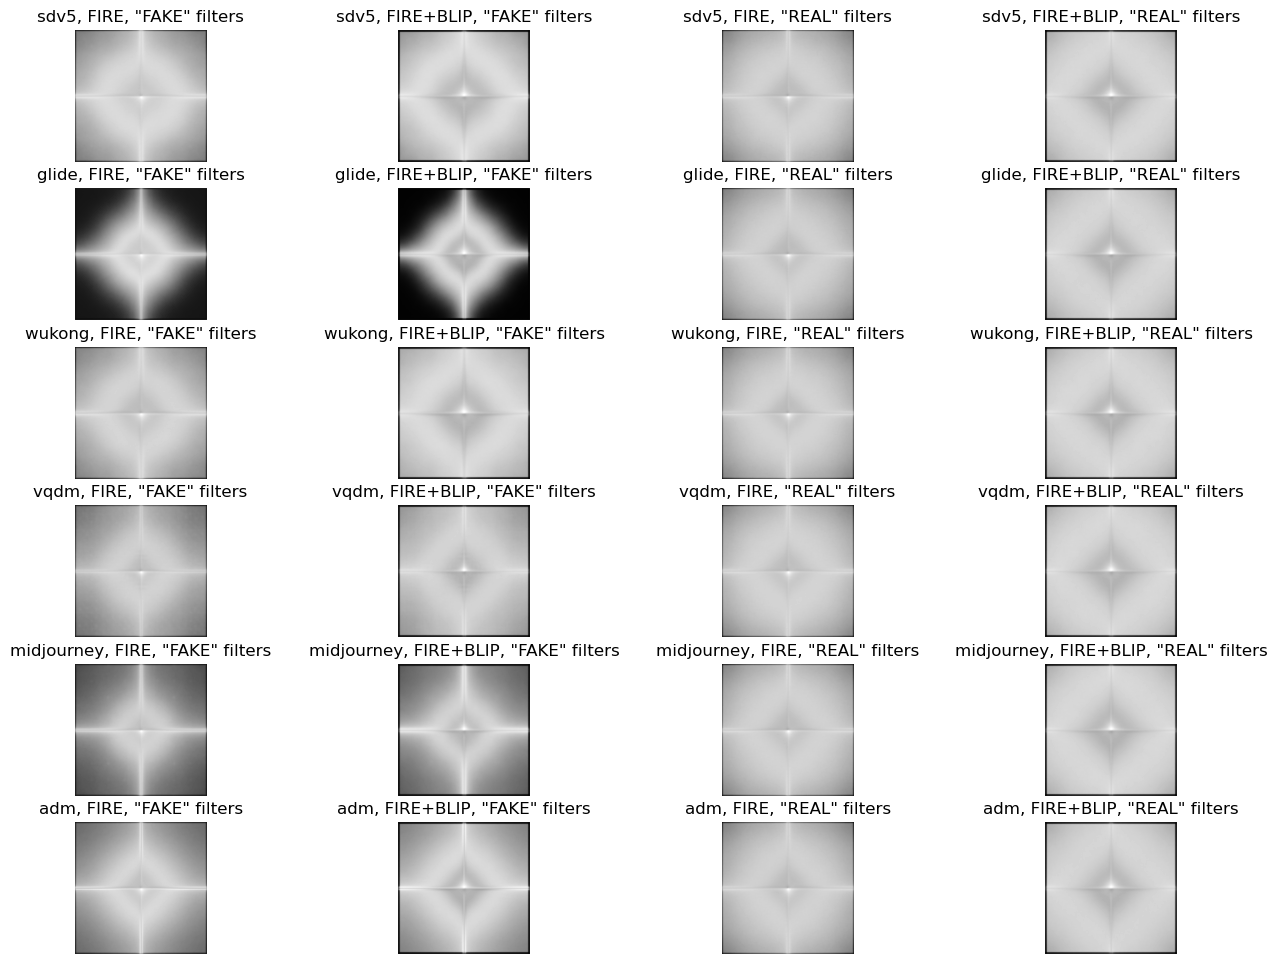

In [15]:
generator_list = df_masks['generator'].unique()
fig, axes = plt.subplots(len(generator_list), 4, figsize=(16, 12))

for i in range(len(generator_list)):
    masks = df_masks[df_masks['generator'] == generator_list[i]]
    filter_fire_fake = masks[masks['real_or_fake'] == 0.0]['mask_mid_frq_fire'].mean()
    filter_fire_real = masks[masks['real_or_fake'] == 1.0]['mask_mid_frq_fire'].mean()
    filter_blip_fake = masks[masks['real_or_fake'] == 0.0]['mask_mid_frq_blip'].mean()
    filter_blip_real = masks[masks['real_or_fake'] == 1.0]['mask_mid_frq_blip'].mean()

    axes[i, 0].imshow(filter_fire_fake, cmap='gray')
    axes[i, 0].set_title(f'{generator_list[i]}, FIRE, "FAKE" filters')
    axes[i, 0].grid(False)
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(filter_blip_fake, cmap='gray')
    axes[i, 1].set_title(f'{generator_list[i]}, FIRE+BLIP, "FAKE" filters')
    axes[i, 1].grid(False)
    axes[i, 1].axis('off')

    axes[i, 2].imshow(filter_fire_real, cmap='gray')
    axes[i, 2].set_title(f'{generator_list[i]}, FIRE, "REAL" filters')
    axes[i, 2].grid(False)
    axes[i, 2].axis('off')
    
    axes[i, 3].imshow(filter_blip_real, cmap='gray')
    axes[i, 3].set_title(f'{generator_list[i]}, FIRE+BLIP, "REAL" filters')
    axes[i, 3].grid(False)
    axes[i, 3].axis('off')

plt.show()

In [16]:
masks = df_masks[df_masks['generator'] == 'adm']
filter_fire_fake = masks[masks['real_or_fake'] == 0.0]['mask_mid_frq_fire'].mean()

In [17]:
filter_fire_fake.shape

(256, 256)